---
title: "Algorithme CAH en utilisant Python"
author: "Olivier Malahel"
format: html
from: markdown+emoji
code-block-bg: true
code-block-border-left: "#31BAE9"
---


## Exemple

Enjeu : On souhaite regrouper les pays selon leur PIB, leur espérance de vie et leur taux d'alphabétisation. 

### Import des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
df = pd.read_csv("donnees_pays.csv")

### Chargement les données 

In [2]:
df = pd.read_csv("donnees_pays.csv")
df.head()

,Pays,PIB_par_hab,Espérance_de_vie,Taux_alphabétisation
0,France,41463,82.5,99.0
1,Allemagne,48649,81.2,99.0
2,Brésil,9602,75.0,93.2
3,Nigeria,2229,61.0,62.0
4,Chine,12720,77.3,96.8


### Normalisation avec sklearn

In [3]:
X = df[["PIB_par_hab", "Espérance_de_vie", "Taux_alphabétisation"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Calcul des liens hiérarchiques (Ward)

In [4]:
Z = linkage(X_scaled, method="ward")

### Affichage du dendrogramme avec ligne de coupure

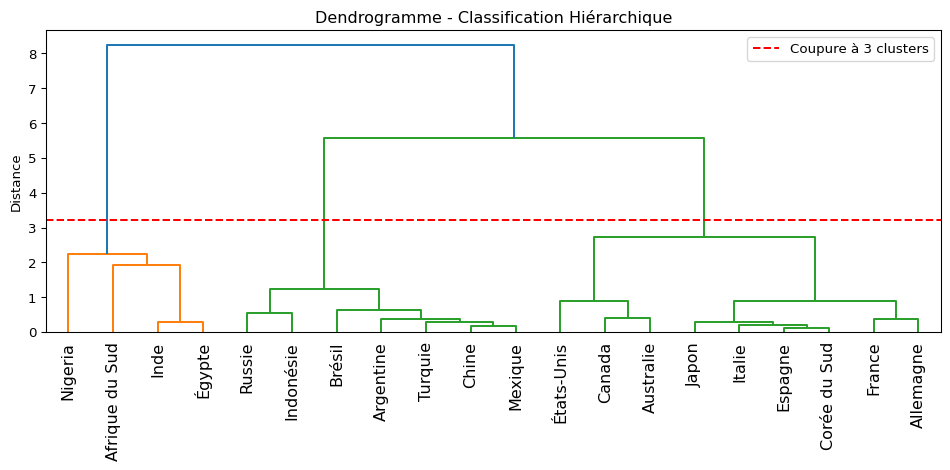

In [5]:
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df["Pays"].values, leaf_rotation=90)
plt.axhline(
    y=Z[-3, 2] + 0.5,
    c='red',
    linestyle='--',
    label="Coupure à 3 clusters"
)
plt.title("Dendrogramme - Classification Hiérarchique")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()

### Découpage en 3 clusters

In [6]:
df["Cluster"] = fcluster(Z, t=3, criterion="maxclust")
df[["Pays", "Cluster"]]

,Pays,Cluster
0,France,3
1,Allemagne,3
2,Brésil,2
3,Nigeria,1
4,Chine,2
5,Inde,1
6,États-Unis,3
7,Japon,3
8,Afrique du Sud,1
9,Mexique,2


## Conclusion : 

La CAH permet d'identifier 3 groupes de Pays: 

- Cluster 1 : Nigeria, Afrique du Sud, Inde, Égypte. 

Ce sont les pays avec un développement faible (PIB par habitant plus faible, espérance de vie plus courte, taux d’alphabétisation relativement bas)

- Cluster 2: Russie, Indonésie, Brésil, Argentine, Turquie, Chine, Mexique

Ce sont des pays émergents avec un niveau de développement économique moyen, une amélioration progressive de l’espérance de vie et de l’éducation,

et un fort potentiel économique. 

- Cluster 3 : États-Unis, Canada, Australie, Japon, Italie, Espagne, Corée du Sud, France, Allemagne

Ce sont les pays développés ayant un PIB par habitant élevé, une espérance de vie longue, et un taux d’alphabétisation proche de 100%.